In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testing-data/test_set_features.csv


**Input the testing data**

In [2]:
df=pd.read_csv('data\test_set_features.csv')

**Check the missing values in data**

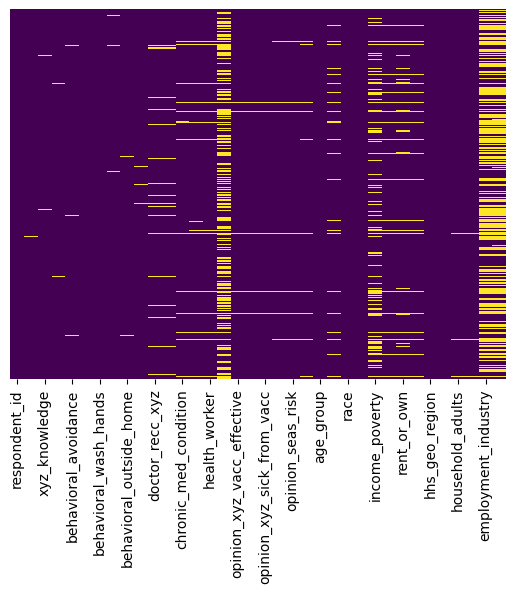

In [3]:
# finding out which columns have missing values using seaborn-heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [4]:
# shows the top 5 columns with most missing values in the testing data
df.isnull().sum().sort_values(ascending=False).head()

employment_occupation    13426
employment_industry      13275
health_insurance         12228
income_poverty            4497
doctor_recc_xyz           2160
dtype: int64

**Handling missing values**

In [5]:
# we see that employment_occupation, employment_industry, health_insurance have too many missing values. hence its better to drop these columns
df=df.drop('employment_occupation',axis=1)
df=df.drop( 'employment_industry',axis=1)
df=df.drop('health_insurance',axis=1)

In [6]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Get lists of numerical and categorical columns with missing values
numerical_cols_with_nulls = numerical_cols[df[numerical_cols].isnull().any()].tolist()
categorical_cols_with_nulls = categorical_cols[df[categorical_cols].isnull().any()].tolist()

In [7]:
from sklearn.impute import SimpleImputer
# we fill in the missing values in the numerical columns with mean of that column
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols_with_nulls] = numerical_imputer.fit_transform(df[numerical_cols_with_nulls])
# we fill in the missing values in the categorical columns with the mode of the column
categorical_imputer=SimpleImputer(strategy='most_frequent')
df[categorical_cols_with_nulls] = categorical_imputer.fit_transform(df[categorical_cols_with_nulls])

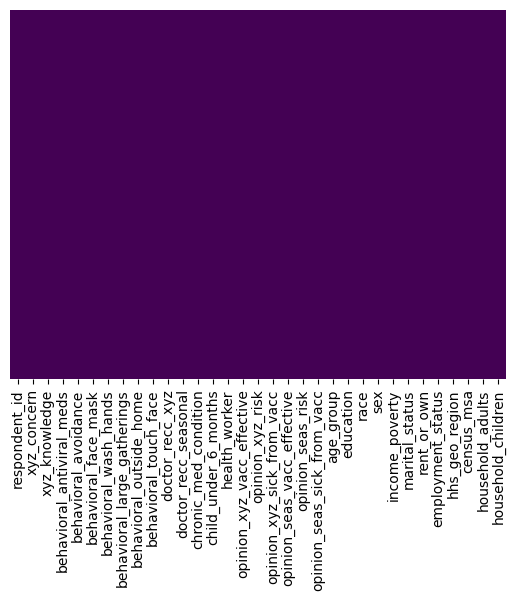

In [8]:
# finally we get rid of all the missing values in the dataframe
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

**Encoding categorical data**

In [9]:
# encode all the categorical data
df=pd.get_dummies(data=df,columns=categorical_cols,drop_first=True)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,True,False,False,False,False
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,True
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,False,False,False,False,True,False,False,False,False,True


**Save the test data**

In [10]:
df = df.drop(columns=['respondent_id'])

In [11]:
df.to_csv('test_data.csv')